## Домашнее задание 2, градиентный спуск
### Deadline - 27.09.2024

# Основная часть

__Задача 1. (всего 5 баллов)__ Рассмотрим следующую задачу оптимизации:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, такая, что $A + A^T$ - положительно определенная матрица, $b \in \mathbb{R}^d$.

__а). (0.5 балла)__ Докажите, что константа сильной выпуклости для этой задачи $\mu = \frac{1}{2} \lambda_{\min} \left(A + A^T\right)$, где $\lambda_{\min}(A)$ - минимальное собственное значение матрицы $A$.

__Ваше решение__

$df = d \bigl( \frac{1}{2} x^T A x - b^T x \bigr) = 
\frac{1}{2} (dx)^T A x + \frac{1}{2} x^T A dx - b^T dx = 
\bigl\{ \text{Так как } (dx)^T A x \in \mathbb{R} \Rightarrow (dx)^T A x = 
\bigl( (dx)^T A x \bigr)^T = x^T A^T dx \bigr\} = 
\bigl\langle \frac{A+A^T}{2} x - b, dx \bigr\rangle = 
\langle \nabla f(x), dx \rangle$

$\hookrightarrow f(y) - f(x) - \langle \nabla f(x), y - x \rangle = 
\frac{1}{2} y^T A y - b^T y - \frac{1}{2} x^T A x + b^T x - \bigl\langle \frac{A+A^T}{2} x - b, y - x \bigr\rangle = 
\frac{1}{2} \langle A^T y, y \rangle - \langle b, y \rangle - \frac{1}{2} \langle A^T x, x \rangle + \langle b, x \rangle - \bigl\langle \frac{A + A^T}{2} x - b, y - x \bigr\rangle = $

$ = \frac{1}{2} \bigl( \langle A^T y, y \rangle - \langle A x, y \rangle - \langle A^T x, y \rangle + \langle A x, x \rangle \bigr) = 
\frac{1}{2} \bigl( \langle A y, y \rangle - \langle A x, y \rangle - \langle A y, x \rangle + \langle A x, x \rangle \bigr) = 
 = \frac{1}{2} \bigl( \langle A^T y, y \rangle - \langle A^T y, x \rangle - \langle A^T x, y \rangle + \langle A^T x, x \rangle \bigr) = $

$ = \frac{1}{2} \langle A (y - x), y - x \rangle = 
= \frac{1}{2} \langle A^T (y - x), y - x \rangle = 
\frac{1}{4} \bigl\langle (A + A^T) (y - x), y - x \bigr\rangle =
\frac{1}{4} (y - x)^T (A + A^T) (y - x) = $

$ = \bigl\{ \text{Так как } A + A^T \in \mathbb{S}_{++}^{d} \Rightarrow \forall v \in \mathbb{R}^d (\lambda_{min}(A + A^T) \|v\|_2^2 \le v^T (A + A^T) v \le \lambda_{max}(A + A^T) \|v\|_2^2 \bigr\} \ge
\ge \frac{1}{4} \lambda_{min}(A + A^T) \|y - x\|_2^2 = \frac{\mu}{2} \|y - x\|_2^2$

**QED**

__б). (0.5 балла)__ Докажите, что константа Липшица для данной задачи $L = \frac{1}{2}\lambda_{\max}\left(A + A^T\right)$, где $\lambda_{max}(A)$ - максимально собственное значние матрицы $A$.

__Ваше решение__

$\| \nabla f(x) - \nabla f(y) \|_2 = 
\| \frac{A + A^T}{2} (x - y) \|_2 = 
\sqrt{ \langle \frac{A + A^T}{2} (x - y), \frac{A + A^T}{2} (x - y) \rangle } = 
\frac{1}{2} \sqrt {(x - y)^T (A+A^T)^2 (x - y)} \le $

$ \le \frac{1}{2} \sqrt {\lambda_{max}((A + A^T)^2)\|x - y\|_2^2} = 
\bigl\{ \text{Так как } A + A^T \in \mathbb{S}^{d} \bigr\} = 
\frac{1}{2} \lambda_{max} (A + A^T) \| x - y\|_2 = 
L \| x - y \|_2$

**QED**

__в). (1 балл)__ Предложите способ генерации матрицы $А$ так, чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$. Докажите, что способ корректен. 

_Hint:_ Диагональная матрица даст только 0.25 балла в данном пункте.

__Ваше решение__

1) Пусть $M \in \mathbb{R}^{d \times d}: \forall i \forall j: M_{i, j}$ взяты из $\mathcal{U}[0, 0.99]$
2) Пусть $T = \frac{M + M^T}{2} \Rightarrow \forall i \forall j T_{i, j} \in [0, 0.99] \wedge T \in \mathbb{S}^{d}$
3) Пусть $S = T + d I_d$. $\forall i \sum_{j=1, j \neq i}^{d}|S_{i, j}| \le n - 1 < n \le |S_{i, i}| \Rightarrow S$ - строго диагонально преобладающая симметричная матрица. $\Rightarrow S$ положительно определена
4) Пусть $P = 2 \frac{L - \mu}{\lambda_{max} (S) - \lambda_{min} (S)} S + 2 \frac{\lambda_{max} (S) \mu - \lambda_{min} (S) L}{\lambda_{max} (S) - \lambda_{min} (S)} I_d$. Умножение матрицы на $k$ умножает все ее собственные значения на $k$, прибавление к матрице $k I_d$ увеличивает все ее собственные значения на $k \Rightarrow \lambda_{max} (P) = 2 L \wedge \lambda_{min} (P) = 2 \mu > 0 \Rightarrow \forall i: \lambda_{i} (P) > 0 \rightarrow P$ положительно определена
5) Пусть $K \in \mathbb{R}^{d \times d}: \forall i \forall j: (j < i \hookrightarrow K_{i, j} \text{ взяты из } \mathcal{U}[0, 1]) \wedge (j = i \hookrightarrow K_{i, j} = \frac{1}{2}) \wedge (j > i \hookrightarrow K_{i, j} = 1 - K_{j, i})$. Пусть $A \in \mathbb{R}^{d \times d}: \forall i \forall j: A_{i, j} = P_{i, j} K_{i, j}$. Тогда $A \in \mathbb{R}^{d \times d} \wedge A + A^T \text{ положительно определена } \wedge \lambda_{max} (A + A^T) = 2 L \wedge \lambda_{min} (A + A^T) = 2 \mu \wedge A \text{ не всегда симметрична } \wedge A \text{ не всегда диагональна}$. 

**QED**

In [99]:
import numpy as np
import matplotlib.pyplot as plt


def GetMatrix(d: int, mu: float, l: float) -> np.ndarray:
    """
    :param d: Dimensions
    :param mu: Convexity parameter
    :param l: Lipschitz constant
    :return: Array
    """
    P = np.random.rand(d, d)
    P = (P + P.T) / 2 + d * np.eye(d)
    egv = np.linalg.eigvals(P)
    P = 2 * ((l - mu) * P + (egv.max() * mu - egv.min() * l) * np.eye(d)) / (egv.max() - egv.min())

    K = np.random.rand(d, d)
    return (K * np.tril(np.zeros((d, d)) + 1, -1) + (1 - K.T) * np.triu(np.zeros((d, d)) + 1, 1) + np.eye(d) / 2) * P

__г). (0.5 балла)__  Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше, и произвольным ненулевым вектором $b$.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/).

In [100]:
import tqdm
import numpy as np


def GradientDescent(grad, criterion, x_0, eps, max_iter, **params):
    """
   :param grad: функция, которая считает градиент целевой функции;
   :param criterion: функция, вычисляющая критерий;
   :param x_0: начальная точка;
   :param eps: точность сходимости (обычно 1e-8);
   :param max_iter: количество итераций;
   **params - содержит именованные гиперпараметры метода:
       params['gamma'](k) - шаг, зависящий от номера итерации.
    """

    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)
    for k in tqdm.tqdm(range(max_iter)):
        x_k -= params["gamma"](k) * grad(x_k)

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

In [101]:
def GetGradF(a, b):
    """
    :param a: First parameter
    :param b: Second parameter
    :return: Gradient function
    """
    return lambda x: ((a + a.T) / 2) @ x - b


def GetCriterionF(x_):
    """
    :param x_: True value
    :return: Criterion function
    """
    return lambda x: np.linalg.norm(x - x_) ** 2


def GetGammaF(l):
    """
    :param l: Lipschitz constant
    :return: 
    """
    return lambda _: 1 / l

__д). (0.5 балла)__ Для задачи с $d = 50$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$ - выпишите формулу для решения в явном виде, а затем, реализуйте, например, с помощью пакетов линейной алгебры (есть встроенный в numpy).

__Ваше решение__

$\nabla f(x^*) = \frac{A + A^T}{2} x^* - b = 0 \Leftrightarrow x^* = 2 (A + A^T)^{-1} b$

In [112]:
D = 50
MU = 1
L = 100

A = GetMatrix(D, MU, L)
B = np.random.randn(D, 1)
x_opt = 2 * np.linalg.inv(A + A.T).dot(B)

__е). (1.5 балл)__ Запустите градиентный спуск на $10^3$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x^0$ (если $b$ ненулевой, то можно взять нулевой $x^0$). Проверьте, сходится ли он. В качестве критерия сходимости используйте $\| x_k - x^*\|^2_2$. Постройте график сходимости:
- по оси абцисс - номер итерации, по оси ординат - значения критерия на этой итерации.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения.

In [113]:
def MakePlot(xlabex: str, ylabel: str, title: str, **kwargs) -> (plt.figure, plt.axis):
    """
    Creates a plot with parameters
    
    :param xlabex: x-axis label
    :param ylabel: y-axis label
    :param title: plot title
    """
    fig, ax = plt.subplots(**kwargs)
    ax.set_xlabel(xlabex)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    return fig, ax

100%|██████████| 1000/1000 [00:00<00:00, 130217.45it/s]


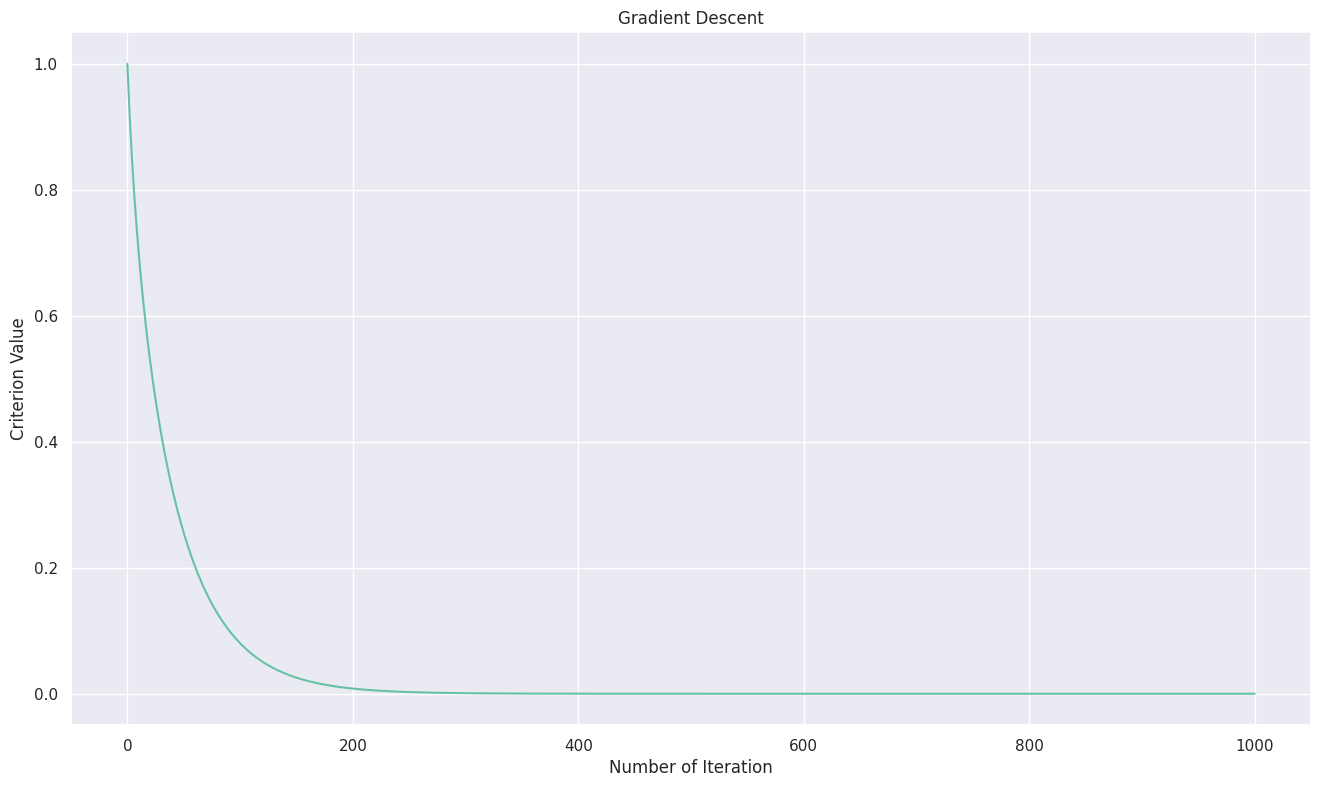

In [114]:
import seaborn as sns

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})

res, error = GradientDescent(GetGradF(A, B), GetCriterionF(x_opt), np.zeros((D, 1)), 0, 1000, gamma=lambda _: 1 / L)

fig_s, ax_s = MakePlot(xlabex="Number of Iteration", ylabel="Criterion Value", title="Gradient Descent")
sns.lineplot(x=np.arange(0, len(error)), y=error, ax=ax_s)
plt.show()

Аналогично предыдущему пункту постройте график сходимости, на котором 
- по оси абцисс - номер итерации, по оси ординат - логарифм значения критерия на этой итерации.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения.

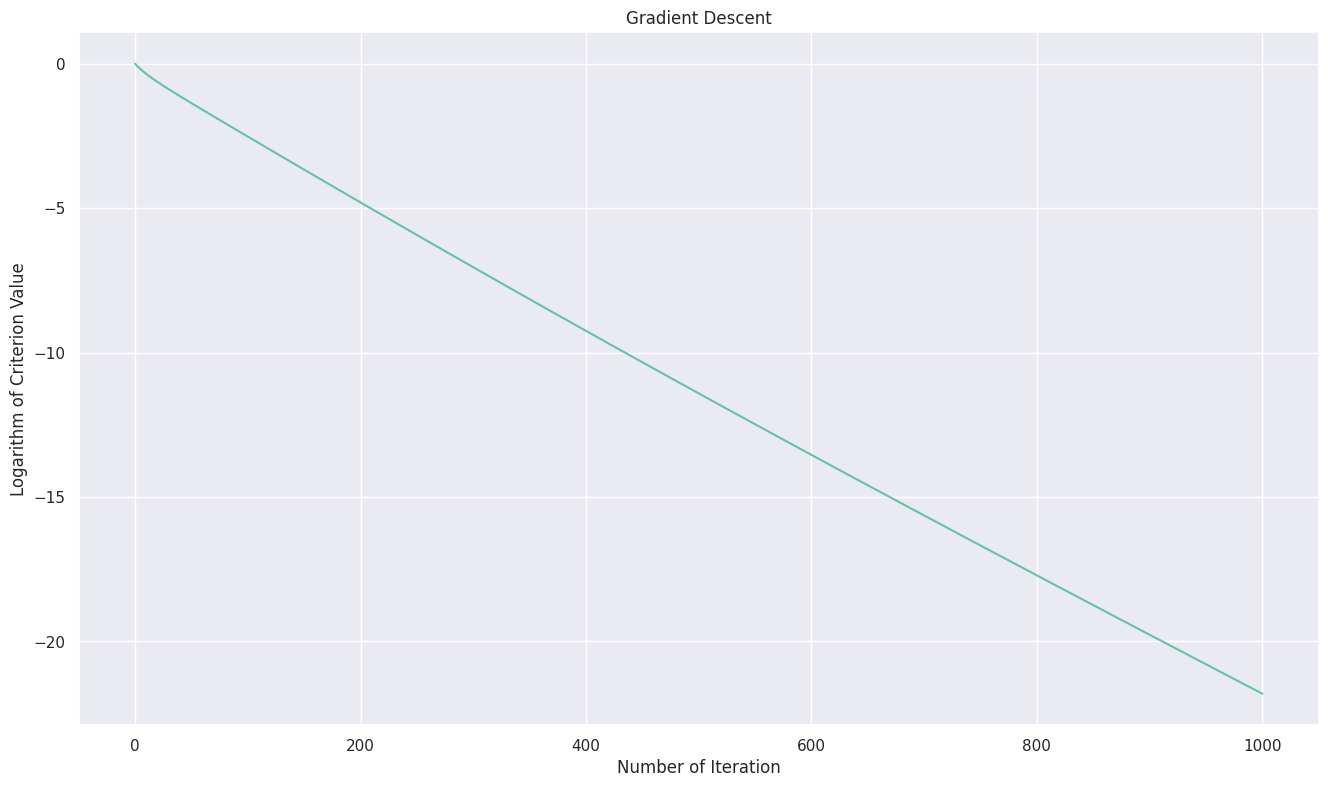

In [115]:
fig_l, ax_l = MakePlot(xlabex="Number of Iteration", ylabel="Logarithm of Criterion Value", title="Gradient Descent")
sns.lineplot(x=np.arange(0, len(error)), y=np.log(error), ax=ax_l)
plt.show()

Сделайте вывод о характере сходимости.

__Ваше решение__

График значений критерия сходимости с логарифмической осью линеен, следовательно, сама сходимость является линейной.

__ж). (0.5 балла)__ Добавьте на оба графика теоретическую сходимость, полученную на лекции. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. 

Сравните со сходимостью, полученной в прошлом пункте, и объясните результат.

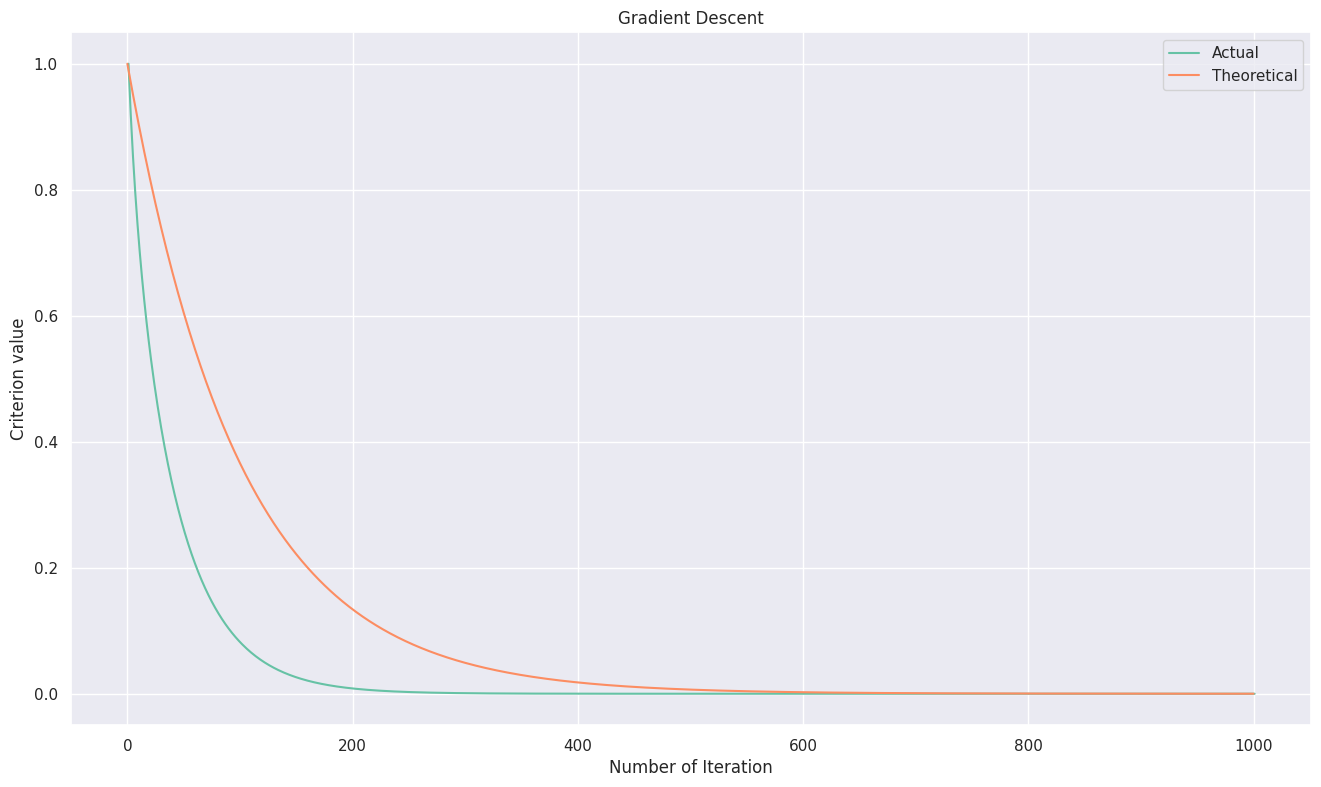

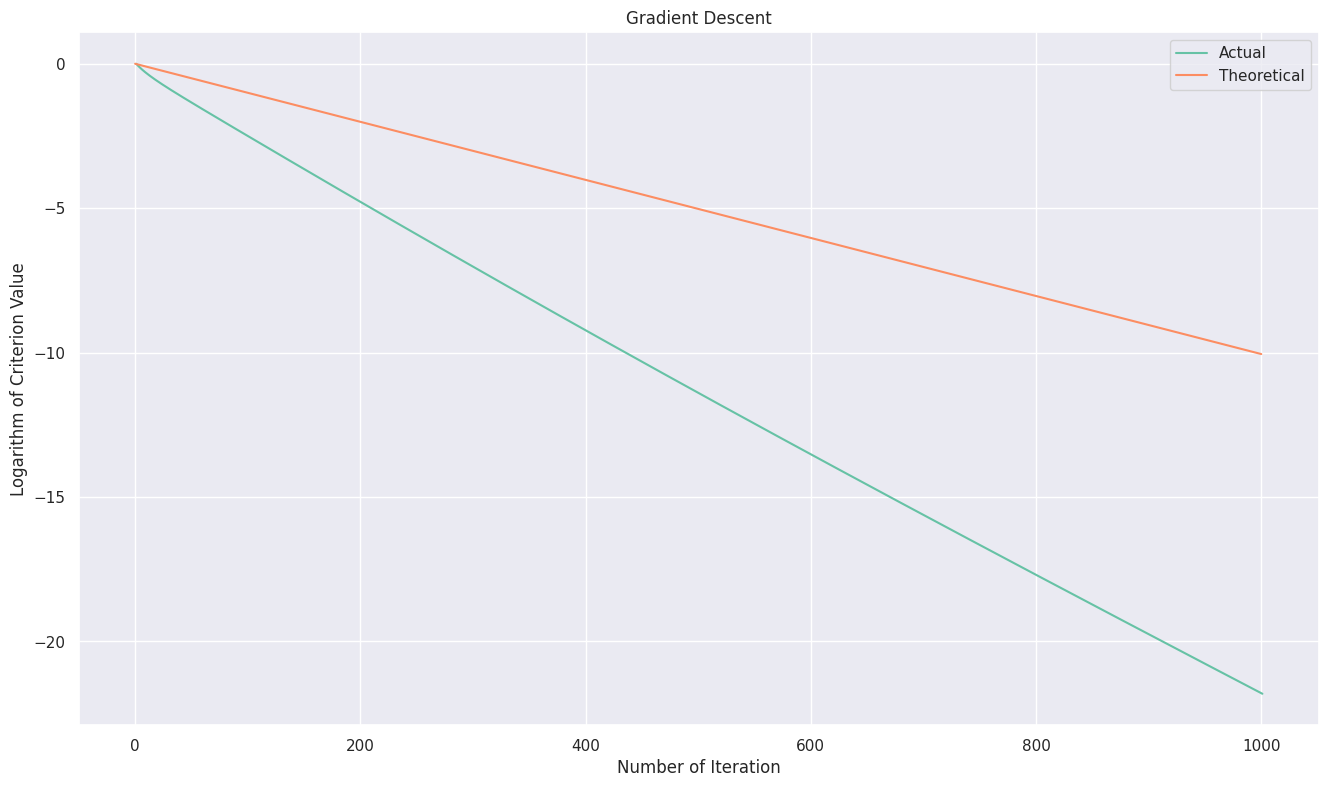

In [116]:
fig_sa, ax_sa = MakePlot(xlabex="Number of Iteration", ylabel="Criterion value", title="Gradient Descent")
sns.lineplot(x=np.arange(1, len(error) + 1), y=error, ax=ax_sa, label="Actual")
sns.lineplot(x=np.arange(0, len(error)), y=np.power(1 - MU / L, np.arange(0, len(error))), ax=ax_sa,
             label="Theoretical")

fig_sl, ax_sl = MakePlot(xlabex="Number of Iteration", ylabel="Logarithm of Criterion Value", title="Gradient Descent")
sns.lineplot(x=np.arange(1, len(error) + 1), y=np.log(error), ax=ax_sl, label="Actual")
sns.lineplot(x=np.arange(0, len(error)), y=np.log(np.power(1 - MU / L, np.arange(0, len(error)))), ax=ax_sl,
             label="Theoretical")

plt.show()

__Ваше решение__

Теоретическая оценка является верхней на скорость сходимости, потому в реальности мы можем получать результаты гораздо лучше, чем ожидалось, что и видим по графику с логарифмической осью. График с обычными осями не информативен для большого количества итераций, но уже для малого видно, что мы выигрываем относительно теоретической оценки.

# Дополнительная часть

__Задача 2. (всего 5 баллов)__ Исследуйте другие способы подбора шага:

__а). (0.75 балла)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$, а также $\gamma = \frac{2}{\mu + L}$ Нанесите все новые запуски на график (теоретическую сходимость можно убрать). На каком шаге получен наибыстрейший результат? Как думаете почему?

In [8]:
#ваше решение

__Ваше решение__

__б). (0.75 балла)__ Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

In [9]:
#ваше решение

__Ваше решение__

__в). (1.5 балла)__ Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

_Hint: является ли одномерная задача на $\gamma$ выпуклой? Является ли выпуклая функция унимодальной?_

__Ваше решение__

In [10]:
#ваше решение

__Ваше решение__

__г). (0.75 балла)__ Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2_2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

In [11]:
#ваше решение

__Ваше решение__

__д). (1.25 балла)__ Сравните все указанные выше подходы подбора шага между собой (в том числе из основной части).
Для этого постройте график сходимости, где 
- по оси абцисс - номер итерации, по оси ординат - логарифм значения критерия

In [12]:
#ваше решение

Аналогично предыдущему пункту постройте график, где
- по оси абцисс - время от начала старта алгоритма, по оси ординат - логарифм значения критерия

In [13]:
#ваше решение

При какой из техник подбора шага градиентный спуск сходится быстрее по итерационной сложности?

Какая техника подбора шага показала наилучший результат с вычислительной стороны (по времени работы алгоритма)?

__Ваше решение__